In [9]:
import numpy as np
import csv

In [35]:
file_path = "./storage/32C7981_save_signal_3.csv"
with open(file_path, 'r') as f:
    data = f.read();

data = data.split(",")

complex_symbols = np.empty([len(data),], dtype=complex)
for i in range(len(data)):
    tmp = data[i].split("|")
    complex_symbols[i] = float(tmp[0]) + 1j*float(tmp[1])

print(complex_symbols.shape, complex_symbols.dtype)

(3084,) complex128


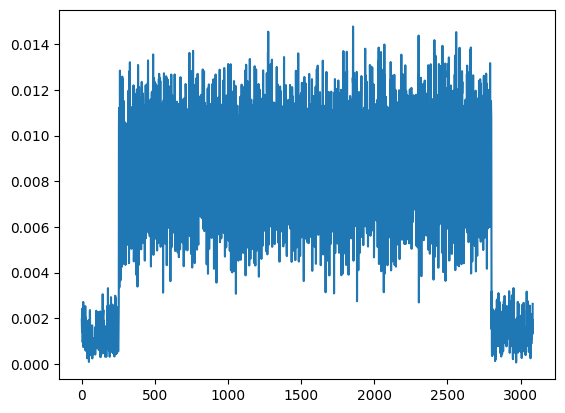

In [36]:
from matplotlib import pyplot as plt
dlen = complex_symbols.size
plot_symb = complex_symbols
plt.plot(np.arange(plot_symb.size), np.abs(plot_symb))

In [37]:
N = 257
M = 31
R = 1
zfc_seq = np.array([np.exp(-1j * np.pi * M * n * (n + 1) / N) for n in range(N)])
zfc_seq_rep = np.tile(zfc_seq, R)
print(zfc_seq.shape)
print(zfc_seq_rep.shape)

(257,)
(257,)


1539


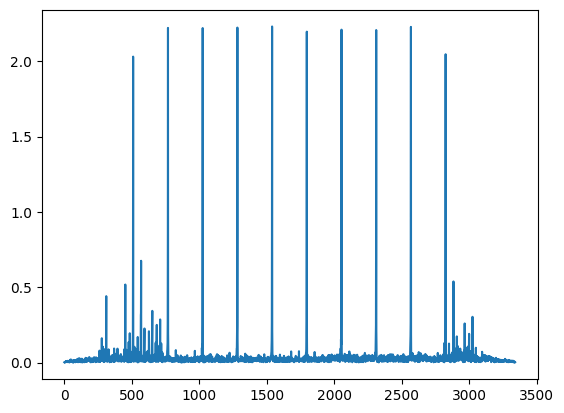

In [38]:
corr_zfc = np.correlate(complex_symbols, zfc_seq, mode='full')
plot_corr = np.abs(corr_zfc) #[N-1:-(N-1)]
plt.plot(plot_corr)
print(np.argmax(plot_corr))

NameError: name 'peaks' is not defined

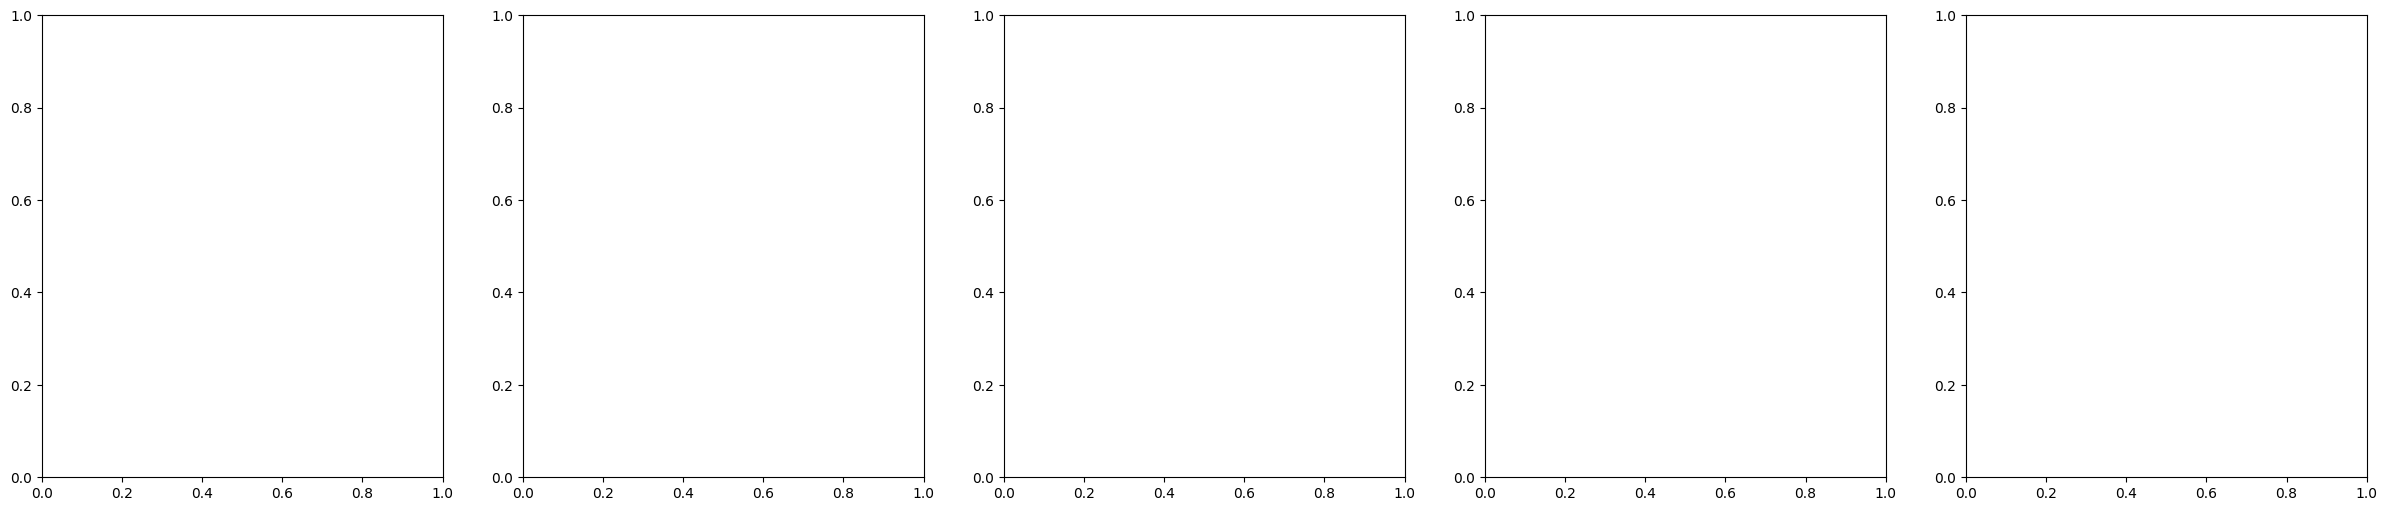

In [22]:
fig, axs = plt.subplots(1, 5, figsize=[30, 6])
axx = axs.flatten()
power_sum = 0.0
for i in range(5):
    toplot = data[int(peaks[i]-256/2) : min(int(peaks[i]+256/2) + 1, data.size - 1)];
    power_sum += toplot.sum()
    axx[i].plot(np.arange(toplot.size), toplot)

power_sum /= (257 * peaks.size)
print(power_sum)

